## Metoda K Najbliższych sąsiadów (KNN)

<img src="Grafika/knn.png",width="500">

Źródło: https://i.pinimg.com/originals/65/36/b9/6536b9a63fc427e0fc3e1a9687b49aff.png

In [2]:
from sklearn.neighbors import KNeighborsClassifier
?KNeighborsClassifier

# argument - _weights_ umozliwia bardziej zlozony schemat klasyfikacji niz klasyfikacja wiekszosciowa

# Klasyfikator SVM - Support Vector Machines

*W sklearn: SVC.* 
*Po polsku: maszyna wektorów nośnych.*

<img src="Grafika/svm_intro1.jpg"style="width: 200px;">
<img src="Grafika/svm_intro2.jpg"style="width: 300px;">
Źródło: https://www.safaribooksonline.com/library/view/python-deeper-insights/9781787128576/ch03s04.html

### Matematyka

Zajmujemy się klasyfikacją binarną, ale przyjmujemy konwencję $Y\in \{-1,1\}$. 

Rozważmy przypadek, gdy dane są liniowo separowalne.

$ \mathbf{w} \cdot \mathbf{x} = 0$ - równanie opisujące linię (hiperpłaszczyznę) rozdzielającą;

$
\begin{equation}
  \left.\begin{aligned}
  \mathbf{w} \cdot \mathbf{x} - b & = 1\\
  \mathbf{w} \cdot \mathbf{x} - b & = -1
\end{aligned}\right\} \text{- równania marginesów.}
\end{equation}
$

Zatem SVM szuka takiej płaszczyzny (parametrów $\mathbf{w}, b$), dla której:

$
\begin{equation}
  \begin{aligned}
  \mathbf{w} \cdot x_i - b & \geq 1, \ \ \text{ gdy } \ y_i = 1, \\
  \mathbf{w} \cdot x_i - b & \leq -1 \ \ \text{ gdy } \ y_i = -1,
\end{aligned}
\end{equation}
$

Co można zapisać w skrócie warunkiem:

$y_i ( \mathbf{w} \cdot x_i - b) \geq 1.$

A ponieważ odległość między marginesami wynosi $\frac{2}{\|\mathbf{w}\|}$, to ostatecznie uczenie klasyfikatora SVM można zdefiniować jako:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \|\mathbf{w}\|, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$

## Dane nieseparowalne 


<img src="Grafika/svm_nonlinear0.png"style="width: 500px;">
Źródło: http://inspirehep.net/record/1265323/plots

Definiujemy zawiasową funkcję straty (*hinge loss*):

$\zeta _{i} = \max{(0, 1 - y_i ( \mathbf{w} \cdot x_i - b))}.$

Funkcja ta przyjmuje wartość $0$, gdy obserawcja $x_i$ leży po właściwej stronie hiperpłaszczyzny rozdzielającej, oraz jej wartość jest proporcjonalna do odległości do płaszczyzny w przypadku, gdy punkt leży po złej stronie.

Uczenie klasyfikatora definiujemy jako minimalizacja funkcji:

$$\bigg[\frac {1}{n}\sum\limits_{i=1}^{n}\max (0,1-y_{i}({\mathbf {w}}\cdot {\mathbf {x}}_{i}-b) )\bigg] + \lambda \| {\mathbf {w}}\| ^{2}.$$

Czyli jednocześnie maksymalizujemy odległość między marginesami (minimalizujemy $\| {\mathbf {w}}\|$) oraz minimalizujemy karę za punkty leżące po złej stronie. $\lambda$ - współczynnik ważący składowe opytmalizowanej funkcji.

Uwaga: tak samo jak w regresji logistycznej w sklearn pojawia się parametr `C` - odpowiada on wartości $\frac{1}{\lambda}$. Zatem: im większe `C`, tym mniejszą wagę przywiązujemy do szerokości marginesu, a większą do położenia punktów po właściwych stronach, czyli margines będzie węższy ale lepiej dopasowany.

<br>
**Uwaga 1**: Czy SVM da nam prawdopodobieństwo przynależenia obserwacji do klas (jak $\pi(x)$ w regresji logistycznej, czy empiryczny procent klas w liściu w drzewie decyzyjnym?

<br>

<br>

Z definicji nie. Ale w praktyce się to robi. W uproszczeniu, przyjmuje się, że $P(Y=1 \mid x) = \text{sigmoid}(x) = \frac{1}{1+e^{-d(x)}}$, gdzie $d(x)$ - odległość punktu $x$ od hiperpłaszczyzny rozdzielającej. W `sklearn` musimy ustawić w konstruktorze SVC parametr `probability=True`, jeśli chcemy żeby klasyfikator wyliczył te prawdopodobieństwa.

<br>

<br>

<br>

**Uwaga 2**: Czy SVM można zastosować do klasyfikacji wieloklasowej?

<br>

<br>

Tak jak w regresji logistycznej, klasyfikator jest zdefiniowany dla problemu klasyfikacji binarnej, ale w praktyce oczywiście jest na to sposób i to się robi. 

Można wykorzystać schemat *one-vs-rest*: w przypadku $K$ klas uczymy model $K$ razy do problemów binarnych - $Y = k$ vs $Y \neq k$. Ostateczna predykcja, to klasa $c$, dla której prawdopodobieństwo $Y = c$ było największe. 

Inny schemat to *one-vs-one*. Uczymy rozwiązywać problem klasyfikacji dla wszystkich kombinacji dwóch klas. Predykcja to najcześciej wskazana klasa przez poszczególne klasyfikatory.

<br>

<br>

<br>

**Uwaga 3**: Czy SVM wymaga jakiegoś przygotowania danych?

Tak - skalowanie.

<br>

<br>

<br>

## Kernel trick

#### Jak można wykorzystać SVM do klasyfikacji w przypadku danych nieliniowych.

<img src="Grafika/svm_nonlinear1.png"style="width: 400px;">

Rozważmy rysunek B. W przedstawionych danych mamy dwie zmienne: $x_1, x_2$. Czy da się zastosować tutaj klasyfikator SVM?

<br>

<br>

Rozszerzmy ręcznie zbiór danych do następujących zmiennych:

$$x_1, x_2, x_1^2, x_2^2.$$

Gdybyśmy do takich zmiennych zastosowali SVM na tym zbiorze, to jak mogłaby wyglądać płaszczyzna rozdzielająca? Na przykład tak:

$$ 0 \cdot x_1 + 0 \cdot x_2 + a \cdot x_1^2 + b \cdot x_2^2 + c= 0.$$

Czyli $\mathbf{w} = [0, 0 , a, b]$.

Wszystko fajnie, ale skąd mamy wiedzieć jakie przekształcenia zmiennych dodać (np. na rysunku poniżej - pomijając już nawet fakt, że w rzeczywistych danych nawet nie będziemy w stanie spojrzeć na jakikolwiek rysunek...)? Możemy dodać dla każdej zmiennej dużo różnych transformacji, ale jeśli zmiennych pierwotnie będzie dużo, to z transfromacjami będzie ich $\text{dużo}^2$...

<img src="Grafika/svm_nonlinear2.png"style="width: 300px;">


Wróćmy do uczenia klasyfikatora, czyli rozwiązywania problemu optymalizacyjnego. 

Przyjmując oznaczenie $\zeta _{i}=\max (0,1-y_{i}(\mathbf{w}\cdot x_{i}-b))$, można go alternatywnie zapisać w postaci:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \frac {1}{n}\sum\limits_{i=1}^{n} \zeta_i + \lambda \|\mathbf{w}\|^2, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1 - \zeta_i \ \text{oraz} \ \zeta_i \geq 0, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$


Okazuje się (matematyka wyższa...), że problem ten można sformułować równoważnie jako problem maksymalizacji funkcji:


$$f(c_1 \ldots c_n) = \sum\limits_{i=1}^n c_i - \frac{1}{2}\sum\limits_{i=1}^n \sum\limits_{j=1}^n y_i c_i (x_i\cdot x_j) y_j c_j,
$$

przy pewnych ograniczeniach, dla pewnych $c_1, \ldots, c_n$ (i tak się to w rzeczywistości odbywa). Widzimy zatem, że rozwiązanie zależy od iloczynów skalarnych obserwacji $x_i\cdot x_j$.

<br>

<br>

Rozważmy transformacje zmiennych i iloczyny sklarne. Przyjmijmy, że mamy dwie zmienne oryginalne: $x_1, x_2$. Załóżmy, że transformujemy dane do $x_1^2, x_1x_2, x_2x_1, x_2^2$. Czyli mamy przekształcenie $f(x_1,x_2) = (x_1^2, x_1x_2, x_2x_1, x_2^2)$. Weźmy przykładowo dwie obserwacje $a = (a_1, a_2), b = (b_1, b_2)$. Obserwacje te w nowej przestrzeni mają postać $f(a) = (a_1^2, a_1 a_2, a_2 a_1, a_2^2), \ f(b) = (b_1^2,b_1 b_2, b_2 b_1, b_2^2)$. Przeanalizujmy iloczyn skalarny:

$f(a) \cdot f(b) = a_1^2 \cdot b_1^2 + a_1a_2 \cdot b_1b_2 + a_2a_1 \cdot b_2b_1 + a_2^2 \cdot b_2^2 = (a_1b_1)^2 + 2a_1a_2b_1b_2 + (a_2b_2)^2$.

Teraz rozważmy funkcję $K(z) = z^2$ i spójrzmy na wynik działania tej funkcji na iloczynie $a \cdot b$:

$K(a \cdot b) = K(a_1 \cdot b_1 + a_2 \cdot b_2) = (a_1 \cdot b_1 + a_2 \cdot b_2)^2 = (a_1b_1)^2 + 2a_1a_2b_1b_2 + (a_2b_2)^2$.

Wniosek?


<br>

<br>



$f(a) \cdot f(b) = K(a \cdot b)$


<br>

<br>



Zatem, zamiast transformować zmienne, wystarczy użyć pewnego przekształcenia $K(x_i \cdot x_j)$ zamiast surowych iloczynów $x_i \cdot x_j$.

Dzięki temu:
- koszt obliczeniowy jest dużo mniejszy.
- pozbywamy się problemu szukania transformacji - w miejsce tego testujemy kilka przekształceń $K$.

$K$ jest zwane **jądrem** (funkcją jądrową, ang. *kernel*).


Jądra w sklearn:

http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [1]:
from sklearn.svm import SVC

In [2]:
?SVC

## Co SVM ma wspólnego z regresją logistyczną?

### Reguła decyzyjna w SVM:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  < 0.
\end{aligned}
\end{equation}
$


### Reguła decyzyjna w regresji logistycznej

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\frac{1}{1+e^{-\beta x_i}} \geq 0.5, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \frac{1}{1+e^{-\beta x_i}} < 0.5,
\end{aligned}
\end{equation}
$

Jest ona równoważna regule:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy } \beta x_i \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \beta x_i < 0.
\end{aligned}
\end{equation}
$

Czyli oba klasyfikatory mają identyczną postać reguły decyzyjnej: __liniową__.

Klasyfikatory o takiej postaci reguły decyzyjnej nazywają się klasyfikatorami liniowymi. Różnią się one sposobem wyznaczania hiperpłaszczyzny (np. prostej w przypadku 2D) rozdzielającej.

Uwaga: pomimo tego, że są to klasyfikatory liniowe, to można objąć nimi nieliniowość (transformacje zmiennych, czy kernel trick w svm).

Zadanie:

Skopiuj kod z :
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Zmodyfikuj go tak, aby wyswietli funkcje decyzyjne dla różnych wariantów klasyfikatora SVM z jądrem radialnym:

a) dla gamma = 2 i wartości C: [0.0001, 0.1, 10, 10000]

b) dla C = 0.1 i wartości gamma: [0.0001, 0.1, 10, 10000]

Zinterpretuj wyniki.

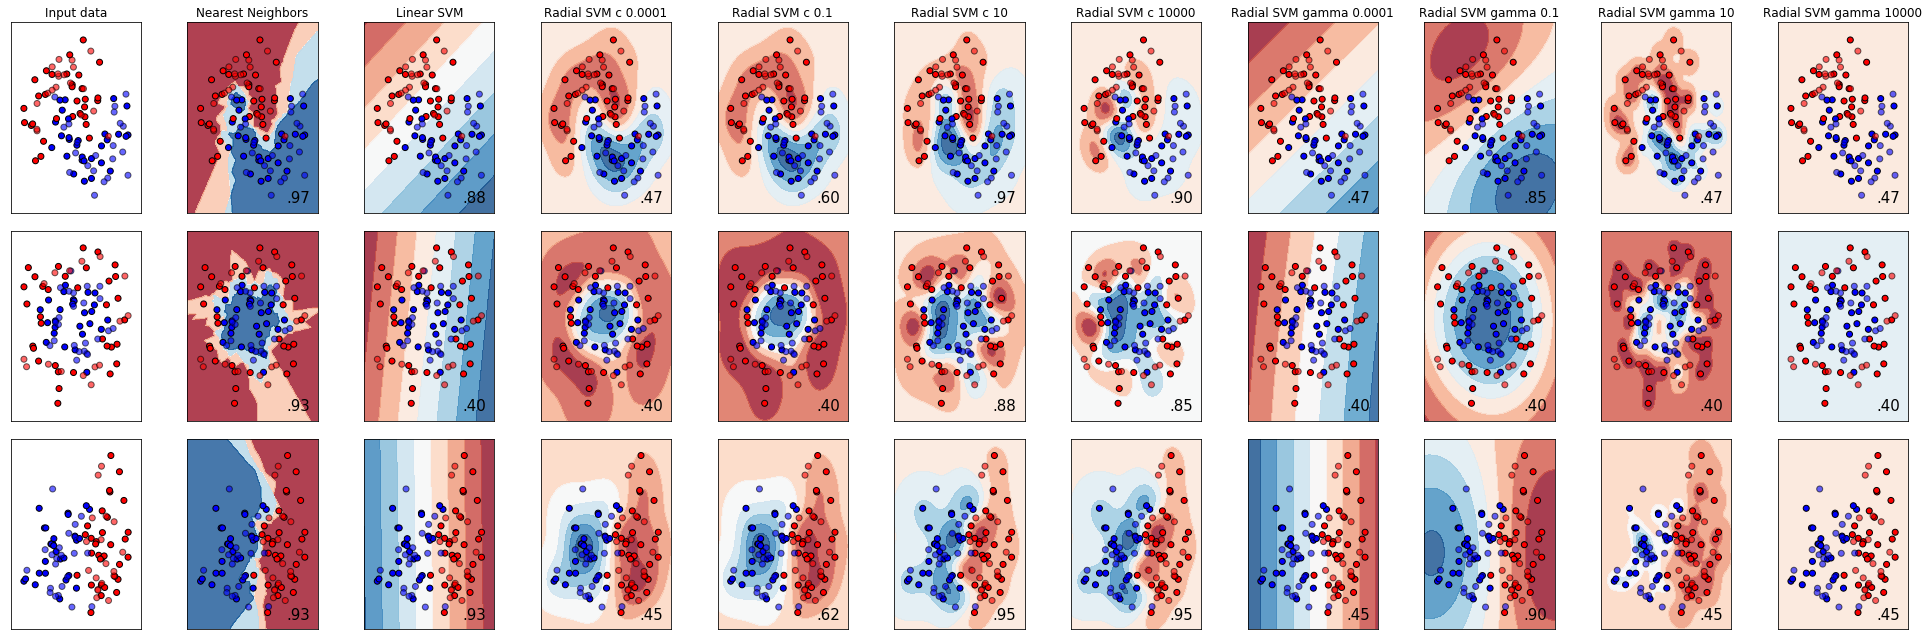

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "Radial SVM c 0.0001", "Radial SVM c 0.1", "Radial SVM c 10",
         "Radial SVM c 10000","Radial SVM gamma 0.0001","Radial SVM gamma 0.1","Radial SVM gamma 10","Radial SVM gamma 10000"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel='rbf', gamma=2, C=0.0001),
    SVC(kernel='rbf', gamma=2, C=0.1),
    SVC(kernel='rbf', gamma=2, C=10),
    SVC(kernel='rbf', gamma=2, C=10000),
    SVC(kernel='rbf', C=0.1, gamma = 0.0001),
    SVC(kernel='rbf', C=0.1, gamma = 0.1),
    SVC(kernel='rbf', C=0.1, gamma = 10),
    SVC(kernel='rbf', C=0.1, gamma = 10000),
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Porównaj działania klasyfikatora SVM z domyslnymi parametrami na danych digits ze standaryzacją i bez standaryzacji.

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X.shape

(1797, 64)

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=1000)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Zoptymalizuj i przetestuj klasyfikator SVM na danych digits.

In [21]:
pipelines = [Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("model", SVC())
]),
             Pipeline([
    ("model", SVC())
                 ])
            ]

param_grids = [{"model__gamma": [0.01, 0.1, 1, 10, 100],
              "model__C": [0.01, 0.1, 1, 10, 100],
                "model__kernel":["linear", "rbf"]},
               {"model__gamma": [0.01, 0.1, 1, 10, 100],
              "model__C": [0.01, 0.1, 1, 10, 100],
                "model__kernel":["linear", "rbf"]}
              ]

for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv=10)
    gs.fit(X_train, y_train)
    print(f' {model} accuracy - {accuracy_score(y_test, gs.predict(X_test))}')

 Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) accuracy - 0.975
 Pipeline(memory=None,
         steps=[('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) accuracy - 0.973


# Lasy losowe

Wyobraźmy sobie, że mamy 100 klasyfikatorów i każdy z nich potrafi przewidywać $Y$ ze skutecznością $70\%$. Pytanie: jaką skuteczność będzie miała procedura klasyfikacyjna polegająca na dokonaniu predykcji każdym klasyfikatorem, a następnie podjęcie ostatecznej decyzji demokratycznie - czyli finalna decyzja to klasa dominująca wśród predykcji tych stu klasyfikatorów?

<br>

<br>

<br>

<br>


Jeżeli każdy klasyfikator ma skuteczność $70\%$, to średnio 70 ze 100 klasyfikatorów podejmie prawidłową decyzję. Jakie jest prawdopodobieństwo, że więcej niż 50 się pomyli? 

Bardzo małe... Zatem mamy doskonałą metodę klasyfikacji: nauczmy dużo modeli i klasyfikujmy demokratycznie.

Zatem po co ogóle uczyć się uczenia maszynowego, skoro możemy załatwić wszystko w ten prosty sposób?

<br>

<br>


Po to, bo jest jeden haczyk: **niezależność**...

Tak pięknie byłoby, gdyby te wszystkie klasyfikatory były niezależne. A nie są... Rozważmy sytuację, w które nauczyliśmy dwa modele: regresję logistyczną i SVM. Na czym polega zależność między tymi klasyfikatorami?

1. Oba klasyfikatory uczone są na tych samych zmiennych - zatem wykryją podobne zależności w danych, co przekłada się na podobieństwo predykcji.

2. Oba klasyfikatory są nauczone na tych samych obserwacjach.

Ponadto w tym konkretnym przypadku oba klasyfikatory są to klasyfikatory liniowe, zatem podejmują decyzję na podstawie płaszczyzny rozdzielającej. Te płaszczyzny mogą być bardzo podobne... A nawet jeśli nie są bardzo podobne, to i tak predykcje obu klasyfikatorów w praktyce będą silnie skorelowane, tzn. oba klasyfikatory będą dawały bardzo podobne predykcje...

Co możemy na to poradzić?

- każdy klasyfikator uczyć na innych zmiennych -> w praktyce losowe podzbiory, 
- każdy klasyfikator uczyć na innym podzbiorze obserwacji (w praktyce ma to mniejsze znaczenie).

W obu przypadkach pojedyncze klasyfikatory będą słabsze (bo wykorzystują mniej informacji), ale globalnie to pomoże!

Czy dwa powyższe zabiegi zapewniają niezależność klasyfikacji między poszczególnymi klasyfikatorami?

Nie, bo:
- nawet jak różne klasyfikatory uczymy na różnych zmiennych, to te zmienne będą z reguły zależne. Do tego w praktyce i tak nie jesteśmy w stanie nauczyć poszczególnych modeli na rozłącznych zbiorach zmiennych, bo musielibyśmy mieć tych zmiennych bardzo dużo (no chyba, że w każdym modelu wykorzystamy bardzo mało zmiennych, ale wtedy te modele będą słabe),
- nawet jak uczymy na różnych obserwacjach, to i tak w tych obserwacjach będą ukryte te same wzorce, które będą wykrywały modele.


### Lasy losowe - komitet drzew uczonych na różnych podzbiorach zmiennych i (ewentualnie) obserwacji.

Na marginesie: ciekawostką jest, że w praktyce przyjęło się, że mówiąc "lasy losowe" mamy na myśli **jeden** klasyfikator, czyli tak naprawdę "LAS losowy".

W sklearn las losowy zdefiniowany jest trochę inaczej:

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
?RandomForestClassifier

W sklearnie drzewa nie są uczone na podzbiorach zmiennych. Randomizacja jest realizowana przez próbkowanie obserwacji (i ewentualnie ograniczanie przeszukiwania podziałów do losowego podzbioru zmiennych o zadanej liczbie).

Opisaną powyżej wersję lasu losowego można otrzymać wykorzystując `BaggingClassifier` 

In [23]:
from sklearn.ensemble import BaggingClassifier

In [10]:
?BaggingClassifier

### Zadanie

Zrealizować przy użyciu tej klasy las losowy o "podręcznikowej" definicji:
- każde drzewo uczone jest na losowym podzbiorze zmiennych (np połowie),
- każde drzewo uczone jest na losowym podzbiorze obserwacji (np. połowie),
- obserwacje losowane są bez powtórzeń.

In [24]:
model = BaggingClassifier(max_features=0.5, max_samples=0.5, bootstrap=False)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.914

### Zadanie

Narysuje wykres skuteczności lasu od liczby drzew na danych digits. Wyciągnij 3 wnioski.

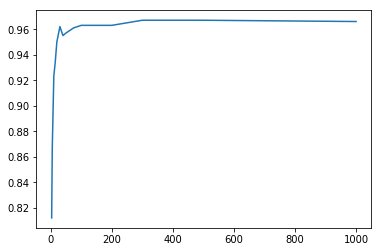

In [27]:
N = [3,5,10,15,20,25,30,40,50,75,100,200,300,500,1000]
acc = []

for n in N:
    model = RandomForestClassifier(n)
    model.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    
plt.plot(N, acc)
plt.show()

### Zadanie

Narysuj wykres skrzynkowy przedstawiający rozkład skuteczności drzew w lesie losowym (po dopasowaniu lasu losowego wyciągnij z niego każde drzewo i oceń jest na zbiorze testowym).

In [28]:
acc = []
for tree in model.estimators_:
    acc.append(accuracy_score(y_test, tree.predict(X_test)))

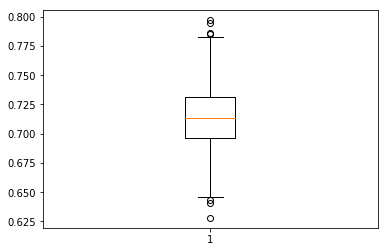

In [29]:
plt.boxplot(acc)
plt.show()

## Case study: Titanic

Znaleźć najlepszy klasyfikator, który będzie przewidywał czy dana osoba przetrwa.

(przyda się funkcja pd.get_dummies())


Cel: porównać wszystkie poznane klasyfikatory.

Tak jak poprzednio na wejściu przyjmujemy listę modeli/pipelinów i siatek parametrów dla każdego modelu i chcemy zaimplementować analizę zupełnie automatycznie

Elementy zadania:
- przygotować dane
- wszystkie klasyfikatory zoptymalizować na części treningowej
- w optymalizacji svm'a nie wykonywać niepotrzebnych obliczeń (różne jądra korzystają z różnych parameterów)
- w baggingu zoptymalizować parametry drzewa


In [31]:
import pandas as pd
data = pd.read_csv("Dane/titanic.csv",decimal=",")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,"Norway Los Angeles, CA"


In [34]:
data.shape

(1046, 12)

In [47]:
y = data.survived
features = ["pclass", "sex", "sibsp", "parch"]
X = pd.get_dummies(data[features])

In [48]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

In [51]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy_score(y_test, predictions)

0.8179190751445087

In [54]:
pipelines = [Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("model", SVC())
]),
             Pipeline([
    ("model", SVC())
                 ]),
            Pipeline([
    ("model", KNeighborsClassifier())
                 ]),
             Pipeline([
    ("model", RandomForestClassifier())
                 ])
            ]

#param_grids = [{"model__gamma": [0.01, 0.1, 1, 10],
#              "model__C": [0.01, 0.1, 1, 10, 100],
#                "model__kernel":["linear", "rbf"]},
#               {"model__gamma": [0.01, 0.1, 1, 10],
#              "model__C": [0.01, 0.1, 1, 10],
#                "model__kernel":["linear", "rbf"]},
#               {},
#               {}
#              ]

param_grids = [{},{},{},{}]

for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv=10)
    gs.fit(X_train, y_train)
    print(f' {model} accuracy - {accuracy_score(y_test, gs.predict(X_test))}')

 Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) accuracy - 0.8208092485549133
 Pipeline(memory=None,
         steps=[('model',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False) accuracy - 0.8208092485549133
 Pipel

In [ ]:
############################# z prowadzacym ##################################

In [76]:
import pandas as pd
data = pd.read_csv("Dane/titanic.csv",decimal=",")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,"Norway Los Angeles, CA"


In [77]:
data.fare.fillna(data.fare.mean(), inplace=True)

In [78]:
data["cabin"] = data.cabin.str[0].fillna("X").replace({"T":"G"})

In [79]:
data.embarked.fillna(data.embarked.mode()[0], inplace=True)

In [80]:
data["sex"] = data.sex.replace({"male":1, "female":0})

In [81]:
X = data.drop(["name", "ticket","home.dest", "survived"], axis=1)
y = data.survived

In [82]:
X

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,3,1,42.0000,0,0,7.5500,X,S
1,3,1,13.0000,0,2,20.2500,X,S
2,3,1,16.0000,1,1,20.2500,X,S
3,3,0,35.0000,1,1,20.2500,X,S
4,3,0,16.0000,0,0,7.6500,X,S
5,3,1,25.0000,0,0,7.6500,F,S
6,2,1,30.0000,1,0,24.0000,X,C
7,2,0,28.0000,1,0,24.0000,X,C
8,3,1,20.0000,0,0,7.9250,X,S
9,3,0,18.0000,0,0,7.2292,X,C


In [83]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3)

# Omówienie projektów